In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# logistic regression
from sklearn.linear_model import LogisticRegression


In [19]:
# read in data
df = pd.read_csv('cleaned_data.csv')

df.head()

C:\Users\gian\AppData\Local\Temp\ipykernel_48200\1812756631.py:2: DtypeWarning: Columns (22,36,37,46,47,48,49,50,51,52,53,54,56,112,113,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


,Reporting Railroad Name,Report Year,Accident Number,Accident Year,Accident Month,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Name,...,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,Norfolk Southern Railway Company,2016.0,120068,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
1,Norfolk Southern Railway Company,2016.0,120068,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
2,Conrail,1981.0,0420001,81.0,4.0,NaN,NaN,NaN,NaN,Conrail,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 3,NaN,Consolidated Rail Corporation,Not Assigned
3,Norfolk Southern Railway Company,2016.0,120161,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
4,Norfolk Southern Railway Company,2016.0,120161,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company


In [20]:
# creating a column with a 1 if there were any deaths in Total Persons Killed, 0 otherwise
df['deaths'] = np.where(df['Total Persons Killed'] > 0, 1, 0)
# make sure this is an int64 type
df['deaths'] = df['deaths'].astype('int64')

In [21]:
# Removing the columns that had deaths
df = df.drop(['Railroad Employees Killed', 'Railroad Employees Injured', 'Passengers Killed', 'Passengers Injured', 'Others Killed', 'Others Injured', 'Persons Killed For Reporting Railroad', 'Persons Injured For Reporting Railroad', 'Total Persons Killed', 'Total Persons Injured', 'Total Killed Form 54', 'Total Injured Form 54'], axis=1)

In [22]:
# drop all non numeric columns
df = df.select_dtypes(include=['float64', 'int64'])
# print remaining columns
df.columns

Index(['Report Year', 'Accident Year', 'Accident Month', 'Other Accident Year',
       'Other Accident Month', 'Maintenance Accident Year',
       'Maintenance Accident Month', 'Day', 'Hazmat Cars',
       'Hazmat Cars Damaged', 'Hazmat Released Cars', 'Persons Evacuated',
       'District', 'Temperature', 'Train Speed', 'Maximum Speed',
       'Gross Tonnage', 'First Car Position', 'Causing Car Number',
       'Causing Car Position', 'Positive Alcohol Tests', 'Positive Drug Tests',
       'Head End Locomotives', 'Mid Train Manual Locomotives',
       'Mid Train Remote Locomotives', 'Rear End Manual Locomotives',
       'Rear End Remote Locomotives', 'Derailed Head End Locomotives',
       'Derailed Mid Train Manual Locomotives',
       'Derailed Mid Train Remote Locomotives',
       'Derailed Rear End Manual Locomotives',
       'Derailed Rear End Remote Locomotives', 'Loaded Freight Cars',
       'Loaded Passenger Cars', 'Empty Freight Cars', 'Empty Passenger Cars',
       'Cabooses'

In [38]:
# find all rows that have na, order by most na to least
# drop all columns with more than 10000 na
na_counts = df.isna().sum()
cols_to_drop = na_counts[na_counts > 1000].index.tolist()

# drop columns with more than 1000 missing values
df.drop(cols_to_drop, axis=1, inplace=True)

# fill in the rest of the na with the mean of the column
df.fillna(df.mean(), inplace=True)

print(df.isna().sum().sort_values(ascending=False))


Report Year                              0
Accident Year                            0
Derailed Mid Train Remote Locomotives    0
Derailed Rear End Manual Locomotives     0
Derailed Rear End Remote Locomotives     0
Loaded Freight Cars                      0
Loaded Passenger Cars                    0
Empty Freight Cars                       0
Empty Passenger Cars                     0
Cabooses                                 0
Derailed Loaded Freight Cars             0
Derailed Loaded Passenger Cars           0
Derailed Empty Freight Cars              0
Derailed Empty Passenger Cars            0
Derailed Cabooses                        0
Equipment Damage Cost                    0
Track Damage Cost                        0
Total Damage Cost                        0
Joint CD                                 0
Derailed Mid Train Manual Locomotives    0
Derailed Head End Locomotives            0
Rear End Remote Locomotives              0
Persons Evacuated                        0
Accident Mo

In [40]:
# Fit a logisitc regression across all variables trying to predict whether or not a person died
log_reg = LogisticRegression(max_iter=10000)
deaths = df['deaths']
log_reg.fit(df.drop(['deaths'], axis=1), df['deaths'])

LogisticRegression(max_iter=10000)

<AxesSubplot:xlabel='feature'>

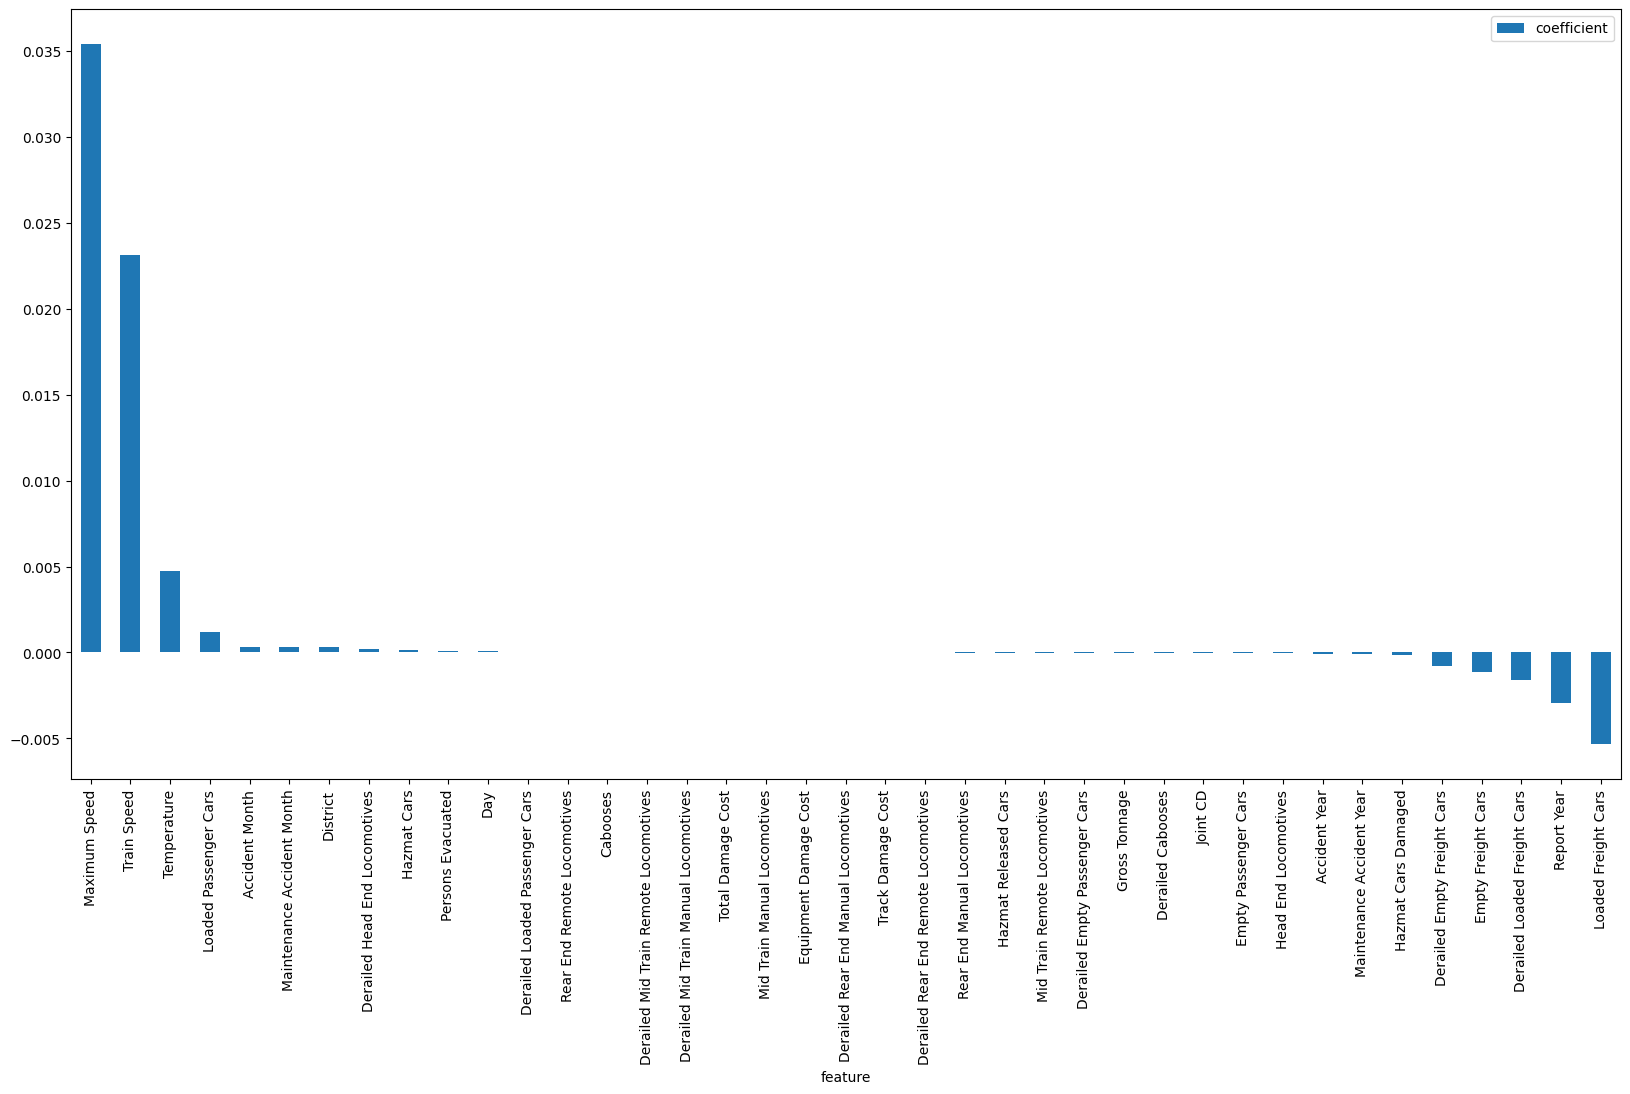

In [48]:
# match the coefficients to the column names
coefficients = pd.DataFrame({'feature': df.drop(['deaths'], axis=1).columns, 'coefficient': log_reg.coef_[0]})
# order the coefficients from highest to lowest
coefficients.sort_values('coefficient', ascending=False)
coefficients.sort_values('coefficient', ascending=False).plot.bar(x='feature', y='coefficient', figsize=(20,10))
